<h1 style="color: #bf0e23  ">Netflix Movies and TV Shows: Clustering</h1>

<h3 style="color:#0ebf26"> Contribution - Individual</h3>

Problem statement:

    Netflix is the world's largest online streaming service provider, with over 220 million subscribers as present It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.italicized text
    We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
    The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.



## Data Description

    show_id : Unique ID for every Movie / Tv Show
    type : Identifier - A Movie or TV Show
    title : Title of the Movie / Tv Show
    director : Director of the Movie
    cast : Actors involved in the movie / show
    country : Country where the movie / show was produced
    date_added : Date it was added on Netflix
    release_year : Actual Releaseyear of the movie / show
    rating : TV Rating of the movie / show
    duration : Total Duration - in minutes or number of seasons
    listed_in : Genre
    description: The Summary description


## importing Library

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ghani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ghani\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
path='C:/Users\Ghani\Downloads\\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(path)

## Understanding data :

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# dataframe shape
df.shape

(7787, 12)

In [5]:
# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Cleaning data:

### Checking for duplicate records:

In [6]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

There are no duplicated records in the dataset.

 ### Checking for missing values 

In [7]:
# Missing values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are many missing values in director, cast, country, date_added, and rating columns

In [8]:
# Checking the unique values in each attribute of the dataset
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

    The missing values in the director, cast, and country attributes can be replaced with 'nan'
    10 records with missing values in the date_added column can be dropped.
    The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [9]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('nan')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [10]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
nan                                                              506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

    There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
    To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
    Also, let's consider only the primary genre of the respective movie / TV show.

In [11]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [12]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [13]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
nan                506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

### Typecasting 'duration' from string to integer

In [14]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [15]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [16]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

### Typecasting 'date_added' from string to datetime:

In [17]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [18]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [19]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

## Exploratory Data Analysis:

Questions-

1-Number of Movies and TV Shows in the dataset</br>
2-Top 10 directors by number of shows directed</br>
3-distribution by released year</br>
4-Top 10 genres</br>
5-Top 10 countries with the highest number of shows</br>
6-Shows added each month over the Month</br>
7-Number of shows added each year </br>
8-Number of movies and TV shows added over the years</br>
9-Number of shows on Netflix for different age groups</br>
10-Movie duration distribution</br>
11-Top 10 TV show directors</br>
12- Top 10 Movie show directors</br>
13-Average movie length over the years</br>
14-Actors who have appeared in highest number of TV shows</br>
15-Top 10 genres for TV Shows


1- Number of Movies and TV Shows in the dataset

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

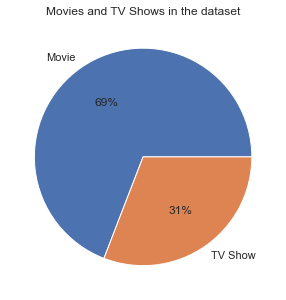

In [21]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(6,5))
df.type.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

2 =>  Top 10 directors by number of shows directed

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

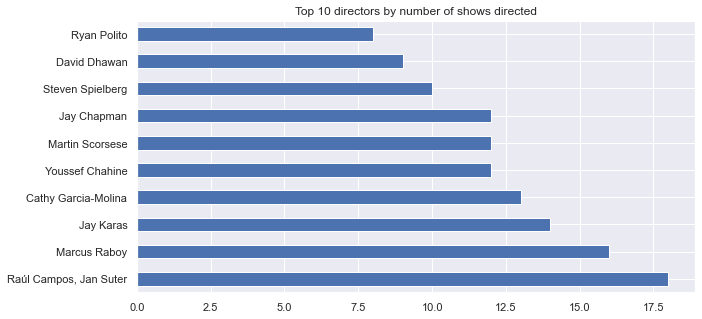

In [22]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='nan')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

3 => distribution by released year

Text(0.5, 1.0, 'distribution by released year')

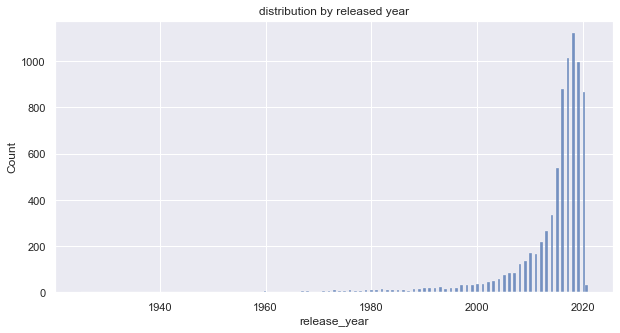

In [23]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Netflix has greater number of new movies / TV shows than the old ones

4 => top 10 genres

Text(0.5, 1.0, 'Top 10 genres')

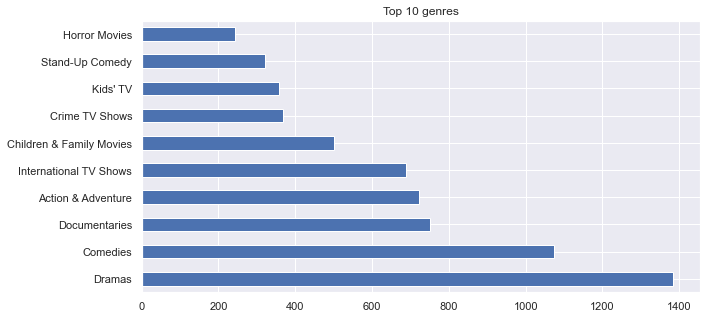

In [24]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

5 => Top 10 countries with the highest number of shows

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

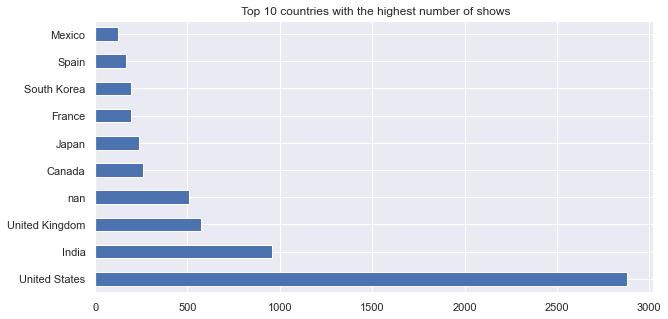

In [25]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

6 => Shows added each month over the years

Text(0.5, 0, 'Month')

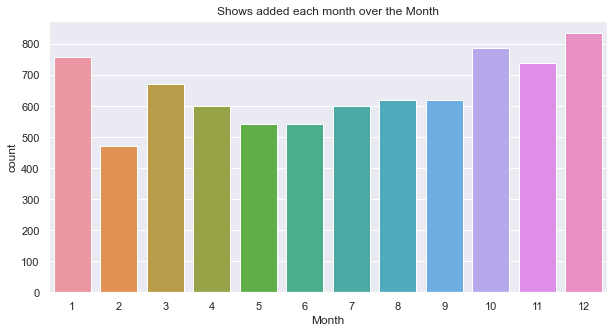

In [26]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
# plt.plot(df.month_added.value_counts(),kind = 'bar')
sns.countplot(data=df,x=df.month_added)
plt.title('Shows added each month over the Month')
plt.xlabel('Month')


4 = >Number of shows added each year

Text(0.5, 0, '')

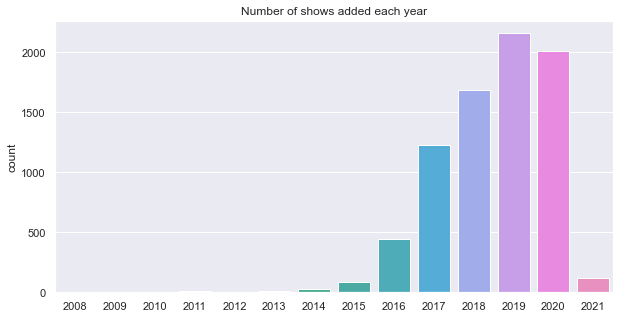

In [27]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(data=df,x=df.year_added)
plt.title('Number of shows added each year')
plt.xlabel('')



Netflix continuous to add more shows on its platform over the years.

There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
    We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.



8 => Number of movies and TV shows added over the years

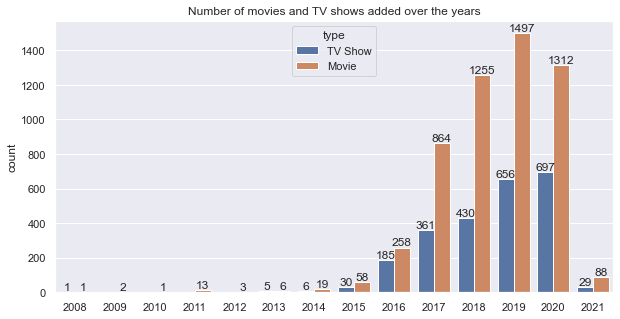

In [28]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
# for i in p.patches:
for container in p.containers:
  p.bar_label(container)

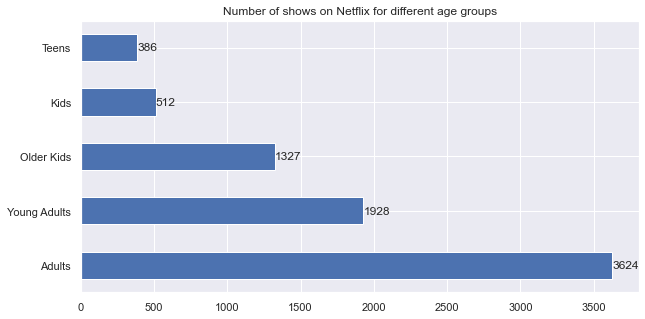

In [29]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
netflix=df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')
for container in netflix.containers:
  netflix.bar_label(container)

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

Text(0.5, 1.0, 'Movie duration distribution')

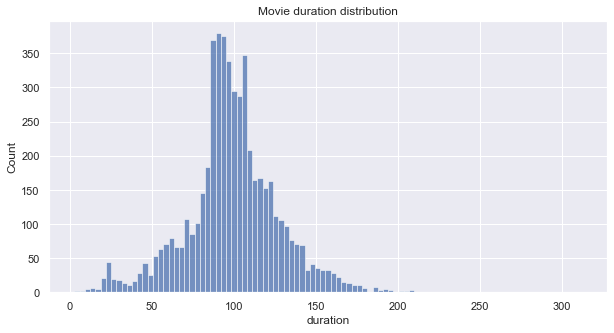

In [30]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

The length of a movie may range from 3 min to 212 minutes, and the distribution is almost normally distributed.

Text(0.5, 1.0, 'Top 10 TV show directors')

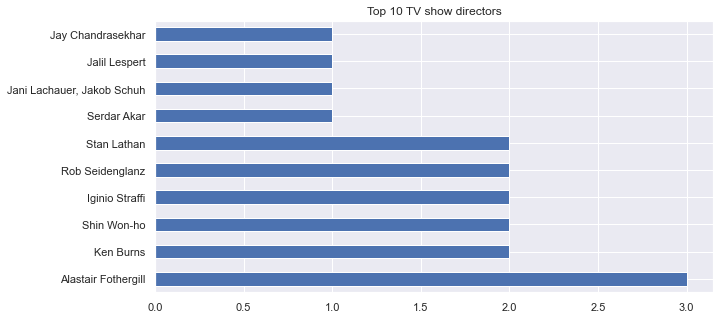

In [31]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='nan') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')



    Alastair Fothergill has directed three TV shows, the most of any director.
    Only six directors have directed more than one television show.



Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

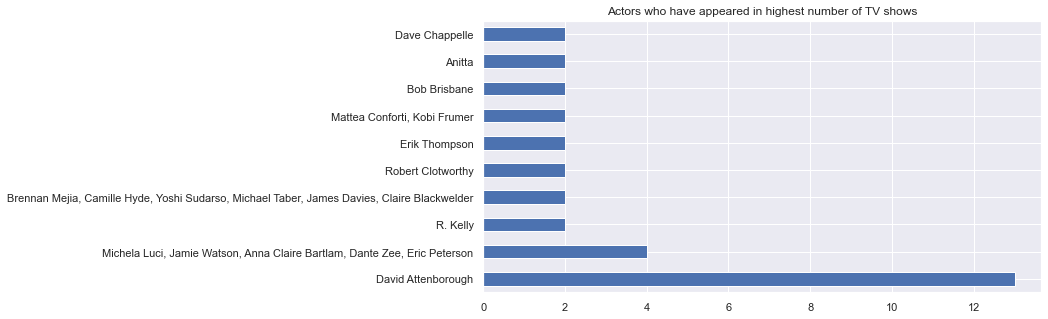

In [32]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='nan') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

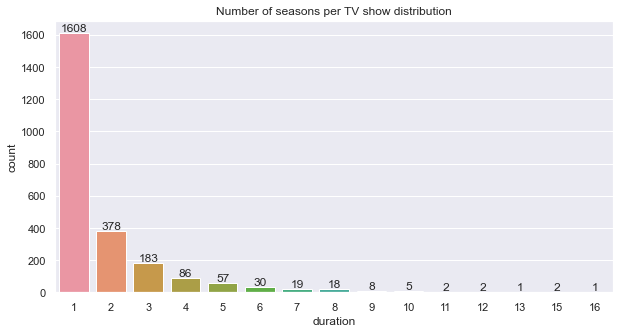

In [33]:
# Seasons in each TV show 
plt.figure(figsize=(10,5))
tvshow = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')
for container in tvshow.containers:
  tvshow.bar_label(container)

    The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
    There are very few TV shows that have more than 8 seasons.

Text(0.5, 0, 'Year')

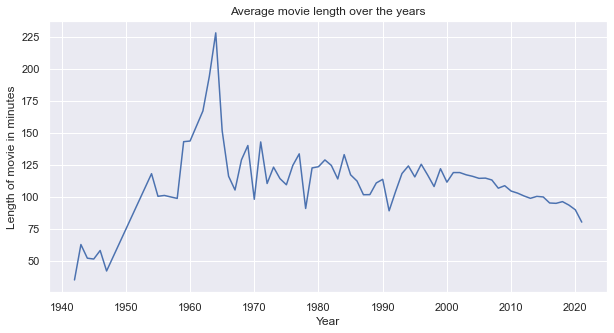

In [34]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

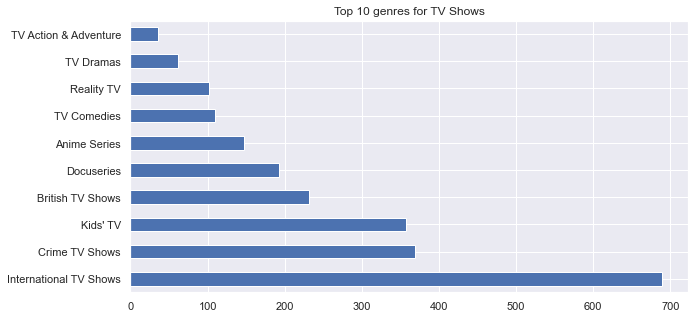

In [35]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

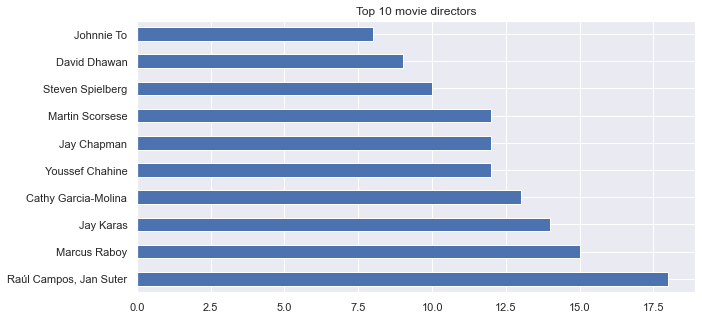

In [36]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='nan') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

    Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
    This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

## Data preprocessing:
#### Modelling Approach:

    Select the attributes based on which you want to cluster the shows
    Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
    Lemmatization to generate a meaningful word out of corpus of words
    Tokenization of corpus
    Word vectorization
    Dimensionality reduction
    Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
    Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:

    Director
    Cast
    Country
    Listed in (genres)
    Description

In [37]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = df.copy()

In [38]:
df1.fillna('',inplace=True)

##### Combining all the clustering attributes into a single column

In [39]:
df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [40]:
df1['clustering_attributes'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

##### function to remove non-ascii characters

In [41]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [42]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [43]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [44]:
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')


import re, string, unicodedata

df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

##### Remove stopwords and lower case

In [45]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [46]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [47]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [48]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [49]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

##### Remove punctuations

In [50]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [51]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [52]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

 ### Lemmatization:

In [53]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [54]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [55]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

### Tokenization:

In [56]:
tokenizer = TweetTokenizer()

In [57]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [58]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [59]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [60]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 222408 stored elements in Compressed Sparse Row format>

In [61]:
# convert X into array form for clustering
X = X.toarray()

## Dimensionality reduction using PCA:

In [62]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

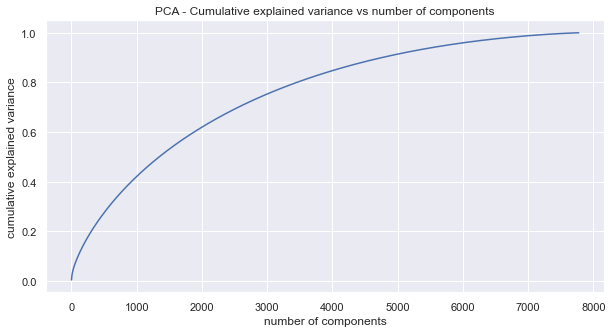

In [63]:

# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7500 components.
Also, more than 80% of the variance is explained just by 4000 components.
Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance

In [64]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [65]:
# transformed features
x_pca = pca.transform(X)

In [66]:
x_pca.shape

(7777, 4000)

We have successfully reduced the dimensionality of data using PCA.

## Clusters implementation:

### K-Means Clustering:

In [67]:
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)

Text(0, 0.5, 'WCSS')

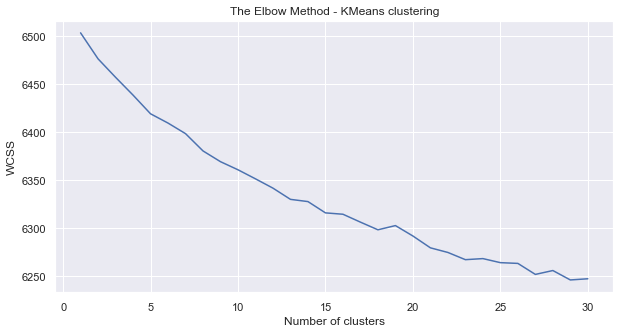

In [68]:
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

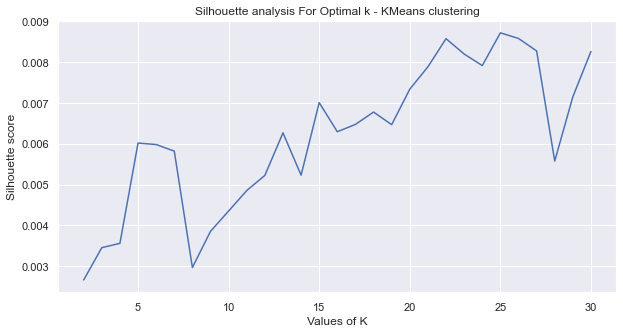

In [69]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()



the highest Silhouette score is obtained for 26 clusters.

Building 26 clusters using the k-means clustering algorithm:


In [101]:
# Clustering the data into 26 clusters
kmeans = KMeans(n_clusters=26,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=26, random_state=33)

In [100]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6263.5583118746945, 0.00857478139689834)


In [102]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

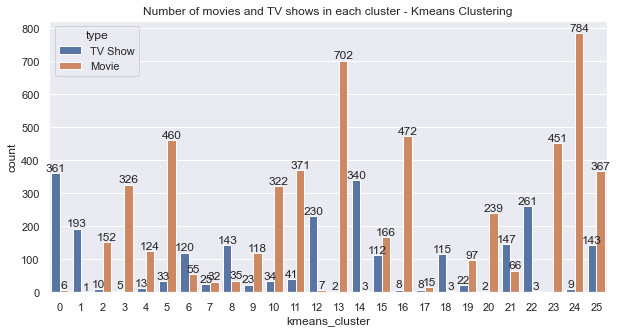

In [103]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for container in q.containers:
  q.bar_label(container)


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

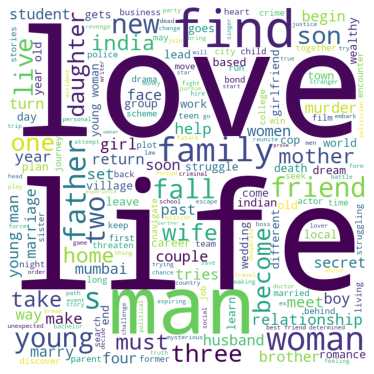

In [76]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

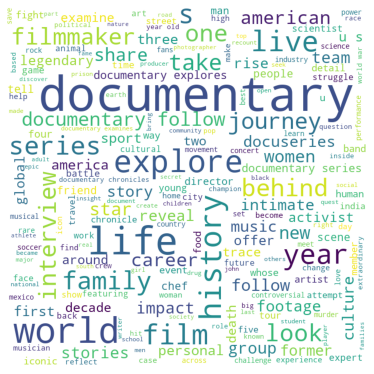

In [77]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

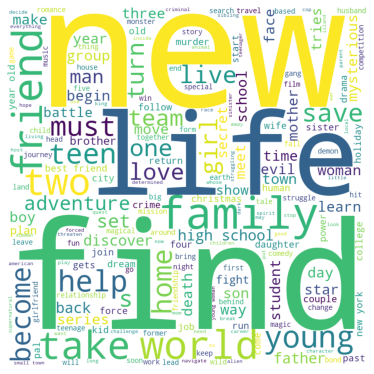

In [78]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

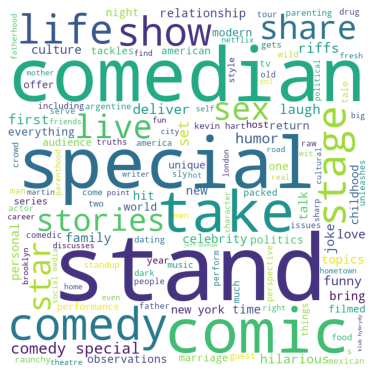

In [79]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

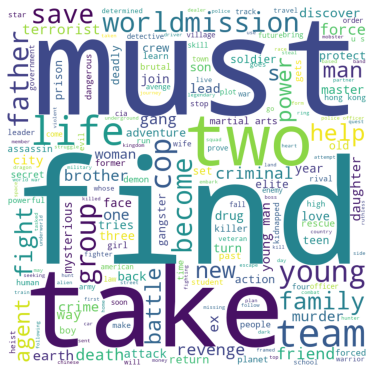

In [80]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

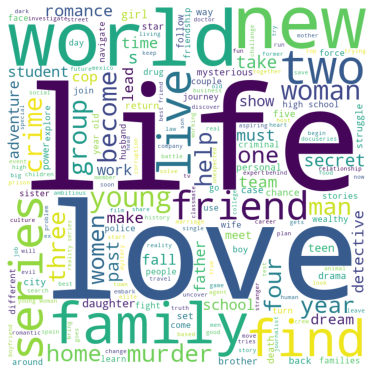

In [81]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

## Content based recommender system:

In [82]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [83]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [84]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [85]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [86]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [87]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [88]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [89]:
# Recommendations for 'The Crown'
recommend_10('The Crown')

If you liked 'The Crown', you may also enjoy:



["Sunderland 'Til I Die",
 'Inside The Freemasons',
 'The Bomb Squad',
 'Greatest Events of WWII in Colour',
 'The Real Football Factories',
 'Edge of the Universe',
 'Flowers',
 'Cuckoo',
 "Dad's Army",
 '100% Hotter']

## Conclusions:

    In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
    The dataset contained about 7787 records, and 11 attributes.
    We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
    It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
    It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
    Through TFIDF Vectorization, we created a total of 20000 attributes.
    We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
    We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 26. This was obtained through the elbow method and Silhouette score analysis.
  
    A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

